In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [5]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [8]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_centered)
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [10]:
pca_df = pd.DataFrame(pca_df, columns=['PCA_1', 'PCA_2'])
pca_df.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [15]:
first_corr = X_centered.corrwith(pca_df.PCA_1)
second_corr = X_centered.corrwith(pca_df.PCA_2)
corrs = pd.concat((first_corr, second_corr), axis=1)
corrs.columns = ['PCA_1', 'PCA_2']
corrs.head()

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960


<AxesSubplot:>

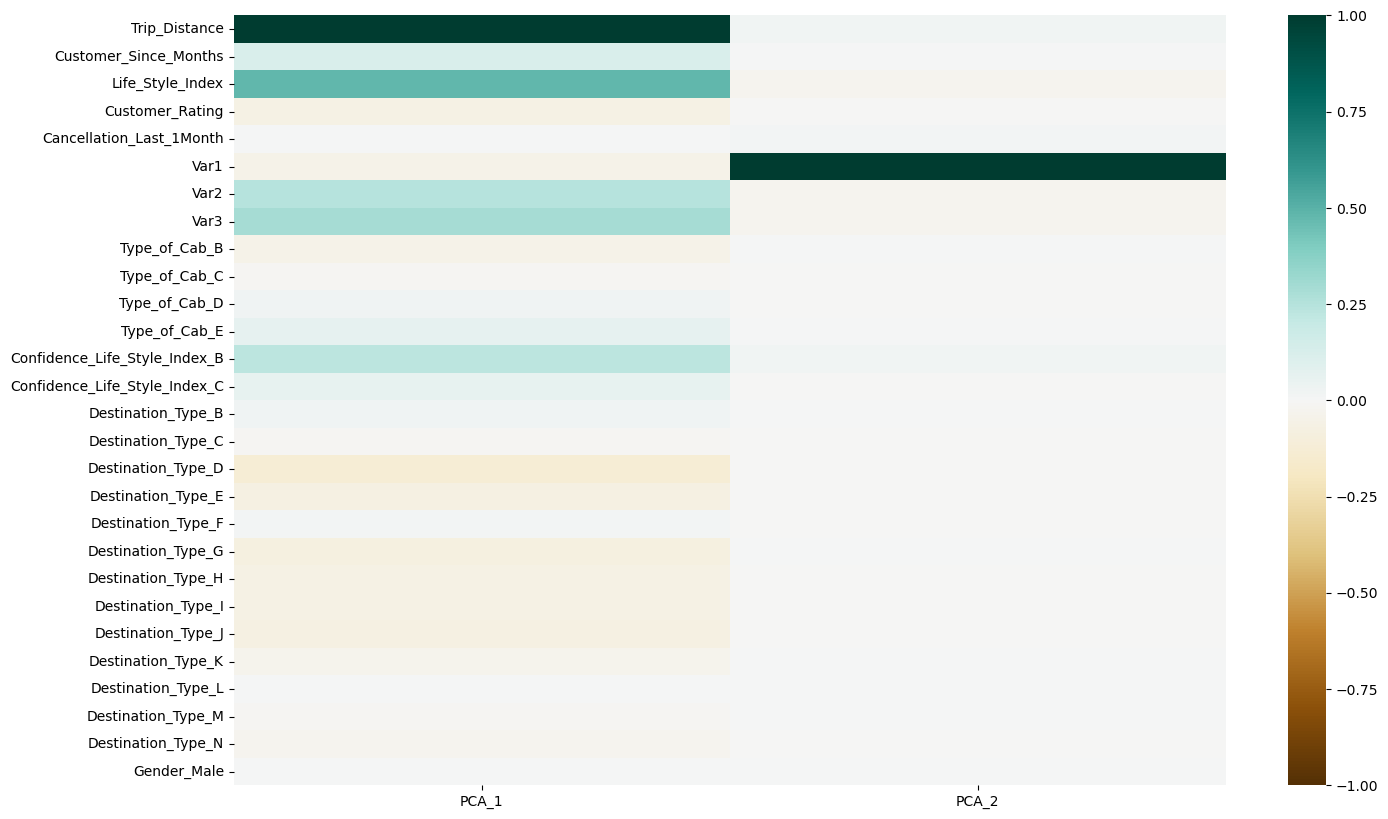

In [19]:
### Your code is here
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(corrs, cmap='BrBG', vmin=-1, vmax=1)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [20]:
### Your code is here
pca_df = pd.concat((pca_df, y), axis=1)
pca_df.head()

,PCA_1,PCA_2,Surge_Pricing_Type
0,-38.743132,-23.282634,2
1,-13.209252,-25.023815,2
2,-2.004910,-1.637085,2
3,17.178458,-0.907657,3
4,14.477389,-11.656752,2


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

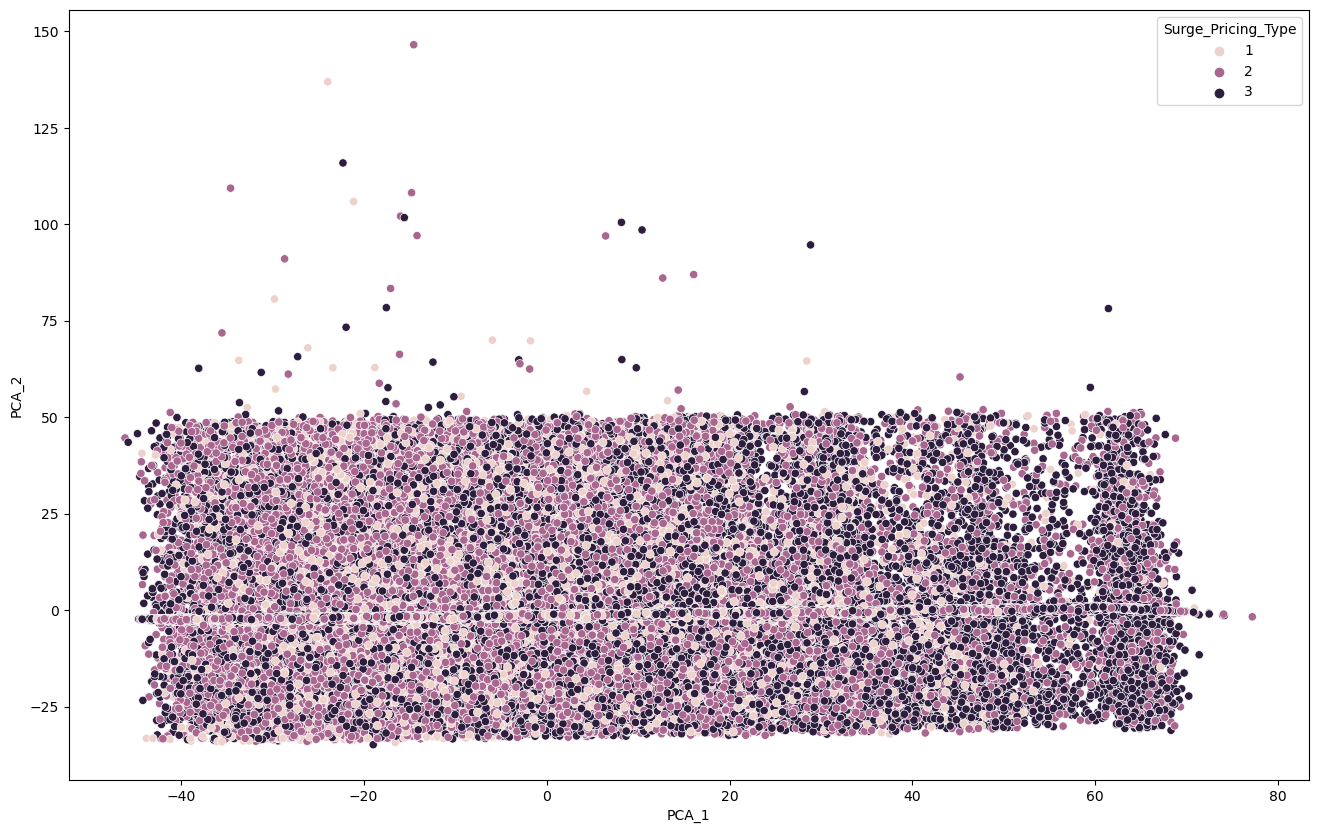

In [23]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.scatterplot(data=pca_df, x='PCA_1', y='PCA_2', hue='Surge_Pricing_Type')

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [25]:
### Your code is here
pca_3d = PCA(n_components=3)
pca_3d_df = pca_3d.fit_transform(X_centered)
pca_3d_df = pd.DataFrame(pca_3d_df, columns=['PCA_1', 'PCA_2', 'PCA_3'])
pca_3d_df.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [28]:
first_corr = X_centered.corrwith(pca_3d_df.PCA_1)
second_corr = X_centered.corrwith(pca_3d_df.PCA_2)
third_corr = X_centered.corrwith(pca_3d_df.PCA_3)
corrs = pd.concat((first_corr, second_corr, third_corr), axis=1)
corrs.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corrs.head()

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222


<AxesSubplot:>

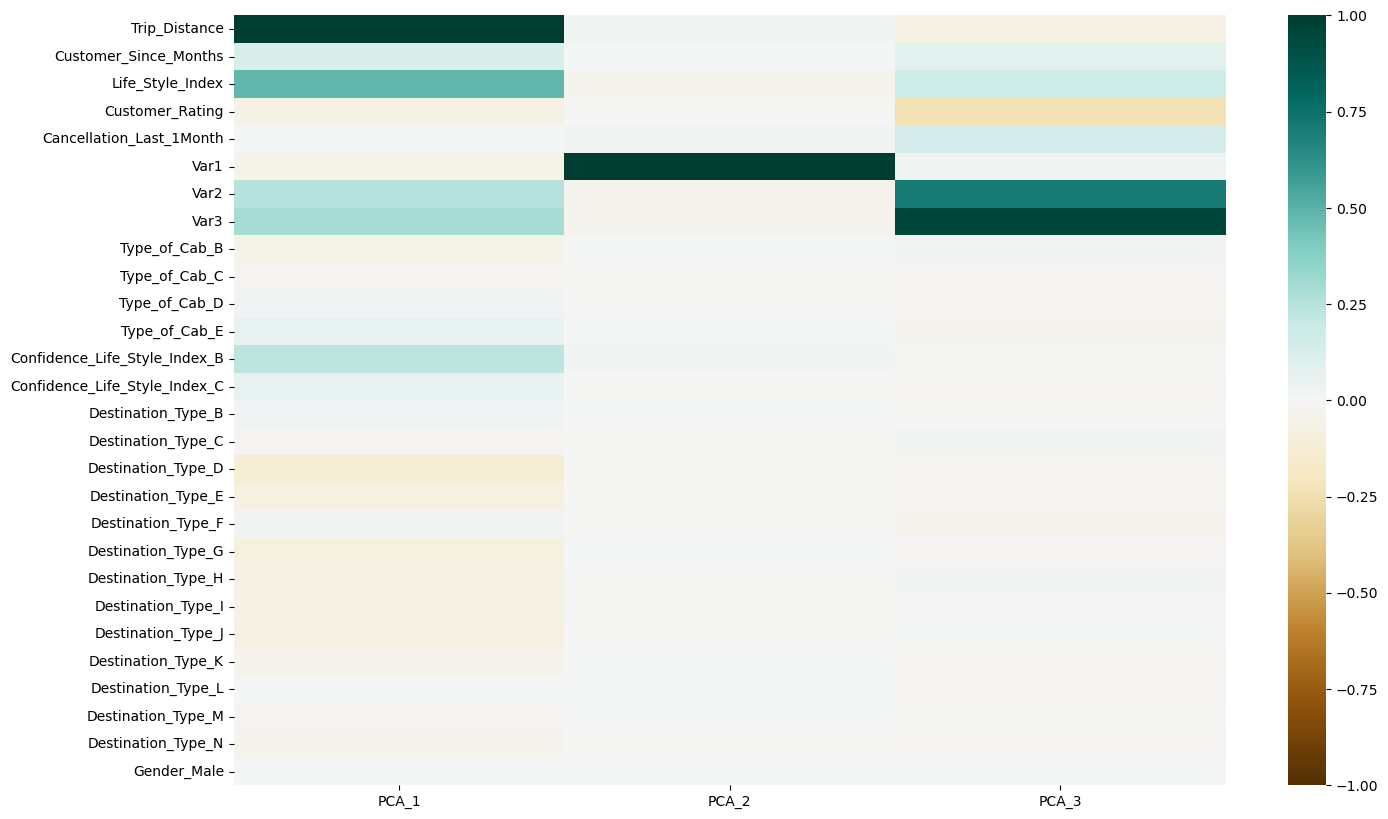

In [29]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(corrs, cmap='BrBG', vmin=-1, vmax=1)

In [30]:
pca_3d_df = pd.concat((pca_3d_df, y), axis=1)
pca_3d_df.head()

,PCA_1,PCA_2,PCA_3,Surge_Pricing_Type
0,-38.743132,-23.282634,-11.303274,2
1,-13.209252,-25.023815,5.664106,2
2,-2.004910,-1.637085,3.663032,2
3,17.178458,-0.907657,-3.191676,3
4,14.477389,-11.656752,22.999348,2


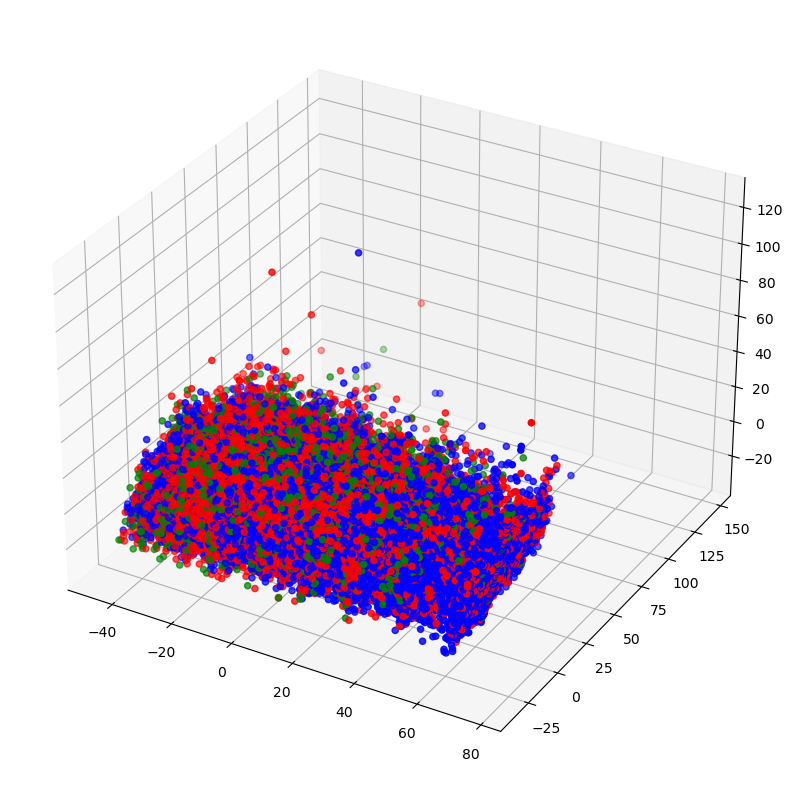

In [36]:
fig = plt.figure()
fig.set_size_inches(16, 10)
ax = plt.axes(projection='3d')
colors = pca_3d_df['Surge_Pricing_Type'].replace([1, 2, 3], ['green', 'red', 'blue'])
ax.scatter3D(pca_3d_df.PCA_1, pca_3d_df.PCA_2, pca_3d_df.PCA_3, c=colors)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [37]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [42]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe_pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('model', LogisticRegression())])
search = GridSearchCV(pipe_pca, param_grid, cv=5)
search.fit(X_train, y_train)
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.696     0.568     11349
           3      0.495     0.507     0.501      9612

    accuracy                          0.485     26333
   macro avg      0.325     0.401     0.356     26333
weighted avg      0.387     0.485     0.427     26333



In [44]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [45]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [51]:
%%time
import datetime
accuracy_dict, f1_score_dict, components_time = {}, {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    ### Your code is here
    time_start = datetime.datetime.now()
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = round(accuracy, 3)
    f1_score_dict[n_components] = round(f1_score, 3)
    components_time[n_components] = round((datetime.datetime.now() - time_start).total_seconds(), 3)
print("Accuracy:", accuracy_dict)
print("f1_scores:", f1_score_dict)
print("Time:", components_time)

Accuracy: {2: 0.485, 4: 0.534, 8: 0.586, 16: 0.592, 28: 0.681}
f1_scores: {2: 0.427, 4: 0.474, 8: 0.523, 16: 0.527, 28: 0.676}
Time: {2: 19.844, 4: 18.75, 8: 24.146, 16: 32.699, 28: 27.646}
Wall time: 2min 3s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [6]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!